# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [ ]:
import torch as th

In [ ]:
!python --version

Python 3.10.12


1\. Создайте тензор и исследуйте его основные характеристики

In [ ]:
t = th.randint(0, 11, size=(10,), dtype=th.float32)
t.dtype

torch.float32

In [ ]:
t.size(), t.shape

(torch.Size([10]), torch.Size([10]))

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [ ]:
t = th.randint(1, 11, size=(10, 5, 5), dtype=th.float32)

In [ ]:
t[0,0,0].item()

1.0

In [ ]:
t[0, 0, [False, True, False, False, True]]

tensor([ 8., 10.])

In [ ]:
t[0, 0, th.arange(5) % 2 == 0]

tensor([ 1.,  5., 10.])

In [ ]:
t = th.randint(1, 11, size=(5, 5), dtype=th.float32)
t2 = th.ones(5)
t, t2

(tensor([[ 5.,  8.,  5.,  8.,  7.],
         [ 5.,  7.,  4.,  1.,  4.],
         [ 4.,  7.,  8.,  6.,  4.],
         [ 2.,  8.,  9.,  9.,  9.],
         [ 4.,  7.,  8.,  5., 10.]]),
 tensor([1., 1., 1., 1., 1.]))

In [ ]:
t + t2

tensor([[ 9.,  6.,  5.,  5.,  9.],
        [ 3., 10.,  7.,  6.,  8.],
        [ 3., 11.,  9.,  5., 11.],
        [ 3.,  5.,  7.,  9.,  8.],
        [10.,  7., 11.,  8.,  5.]])

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

4\. Исследуйте совместимость `torch` с `numpy` и `sklearn`

In [ ]:
import numpy as np

In [ ]:
np.sin(t)

tensor([[-0.9589,  0.9894, -0.9589,  0.9894,  0.6570],
        [-0.9589,  0.6570, -0.7568,  0.8415, -0.7568],
        [-0.7568,  0.6570,  0.9894, -0.2794, -0.7568],
        [ 0.9093,  0.9894,  0.4121,  0.4121,  0.4121],
        [-0.7568,  0.6570,  0.9894, -0.9589, -0.5440]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MinMaxScaler().fit_transform(t)

array([[1.        , 1.        , 0.2       , 0.875     , 0.5       ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.66666667, 0.        , 0.8       , 0.625     , 0.        ],
       [0.        , 1.        , 1.        , 1.        , 0.83333333],
       [0.66666667, 0.        , 0.8       , 0.5       , 1.        ]])

In [ ]:
import torch as th

In [ ]:
th.cuda.is_available()

True

In [ ]:
t = th.randint(1, 11, size=(5, 5))
t.to(device='cuda')

tensor([[ 9, 10,  2,  9, 10],
        [ 2,  7,  1,  8,  1],
        [ 2,  4,  3,  3,  3],
        [ 7,  5,  6,  6,  8],
        [10,  4,  4,  4,  3]], device='cuda:0')

## Задачи для самостоятельного решения

In [1]:
import torch as th
import numpy as np

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

In [20]:
t = th.zeros(size=(100000, 10))
rand_cols = th.randint(10, size=(100000,))
t[th.arange(0, 100000), rand_cols] = 1
t[:5]

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [22]:
pi = t.sum(axis=0) / 100000
pi

tensor([0.1007, 0.1019, 0.1000, 0.0996, 0.0994, 0.1025, 0.0980, 0.1001, 0.0980,
        0.0997])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над побочной диагональю.

In [27]:
t = th.randint(0, 11, size=(10, 10))
t

tensor([[ 4,  9,  1,  7,  6,  4,  8,  8,  7,  8],
        [ 4,  4,  6,  9,  7,  5,  4,  2,  1, 10],
        [10,  9,  4,  1,  2,  9,  4,  0, 10,  6],
        [10,  4,  6,  8,  5,  0,  9,  5,  2,  7],
        [ 2,  7,  4,  2,  8, 10,  6, 10,  5,  7],
        [ 8,  8,  4,  7,  6,  1,  0,  0, 10,  0],
        [ 1,  6,  5, 10,  6,  4,  9,  2,  2,  6],
        [ 4, 10,  2,  5,  2,  5,  5,  2,  1,  6],
        [ 0, 10,  6,  7,  0,  6,  1,  6,  8,  1],
        [ 7,  1,  8,  5,  8,  1, 10,  2,  1,  0]])

In [34]:
t[th.arange(0, 9), np.arange(1, 10)[::-1] - 1]

tensor([ 7,  2,  4,  0,  8,  7,  5, 10,  0])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 2х2 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

In [54]:
t_3 = th.randint(0, 101, size=(5,5))
t_3

tensor([[75, 31, 14, 85, 58],
        [40, 79, 10, 17, 73],
        [ 1, 39, 51, 37,  1],
        [ 8, 94, 71, 17, 43],
        [71, 19, 22, 83, 27]])

In [55]:
ind = t_3.argmax()
ind = ((ind // 5).item(), (ind % 5).item())
ind

(3, 1)

In [56]:
row_start = max(ind[0] - 1, 0)
row_end = min(ind[0] + 2, 5)
col_start = max(ind[1] - 1, 0)
col_end = min(ind[1] + 2, 5)

t_3_new = th.empty_like(t_3).copy_(t_3)
t_3_new[:row_start, :] = 0
t_3_new[row_end:, :] = 0
t_3_new[:, :col_start] = 0
t_3_new[:, col_end:] = 0
t_3_new

tensor([[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 1, 39, 51,  0,  0],
        [ 8, 94, 71,  0,  0],
        [71, 19, 22,  0,  0]])

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

In [73]:
t_res = th.stack([t_3, t_3_new], dim=-3)
th.save(t_res, 'tensor.pt')

In [78]:
t_read = th.load('tensor.pt')
(t_res == t_read).prod()

tensor(1)

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

In [80]:
t = th.randint(1, 11, size=(2, 3, 5, 5), dtype=th.float32)
t

tensor([[[[ 8.,  7., 10.,  1.,  7.],
          [10.,  7.,  7.,  2.,  8.],
          [ 5.,  6., 10.,  6.,  4.],
          [ 7., 10.,  2.,  5.,  1.],
          [ 7.,  5.,  2.,  5.,  7.]],

         [[ 4.,  9.,  5.,  3.,  2.],
          [ 1.,  5.,  8., 10.,  1.],
          [ 2.,  1., 10.,  3.,  5.],
          [ 2.,  5.,  7.,  2.,  4.],
          [ 2.,  5.,  1.,  9.,  7.]],

         [[ 9.,  3.,  8.,  5.,  1.],
          [10.,  3.,  3.,  7.,  3.],
          [ 1.,  8.,  7., 10.,  6.],
          [ 1.,  2.,  6.,  3.,  2.],
          [ 5.,  3.,  6.,  7.,  5.]]],


        [[[10.,  9.,  9.,  2.,  8.],
          [ 4.,  6.,  4.,  9.,  8.],
          [ 5.,  9.,  4.,  3.,  6.],
          [ 1.,  9., 10.,  4.,  3.],
          [ 1.,  3.,  6.,  5.,  6.]],

         [[ 8.,  3.,  4.,  9.,  9.],
          [ 5.,  1., 10.,  1.,  2.],
          [ 6.,  5.,  1.,  5.,  5.],
          [ 5.,  8.,  3.,  7.,  6.],
          [ 1.,  9.,  9.,  6.,  1.]],

         [[ 6.,  2., 10.,  1.,  1.],
          [ 7.,  3.,  9., 

In [101]:
t.mean(axis=[2, 3]).reshape(2, 3, 1)

tensor([[[5.9600],
         [4.5200],
         [4.9600]],

        [[5.7600],
         [5.1600],
         [5.0000]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

In [2]:
from torch.distributions.exponential import Exponential
import matplotlib.pyplot as plt

In [6]:
sample = Exponential(rate=5).sample((100_000_000,))

CPU times: user 876 ms, sys: 911 µs, total: 877 ms
Wall time: 879 ms


<BarContainer object of 100 artists>

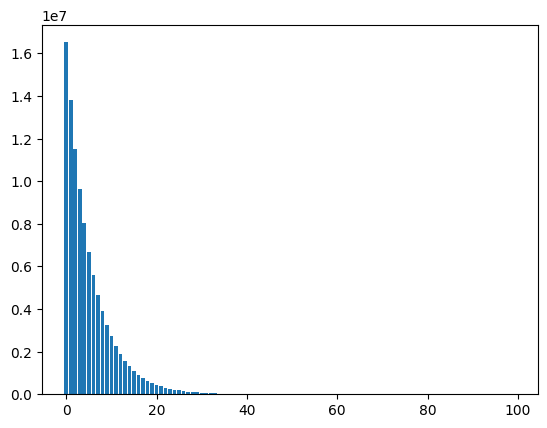

In [118]:
%%time
hist = th.histc(sample, bins=100)
plt.bar(range(100), hist);

In [10]:
sample_gpu = sample.to(device='cuda')

CPU times: user 110 ms, sys: 3.09 ms, total: 113 ms
Wall time: 117 ms


<BarContainer object of 100 artists>

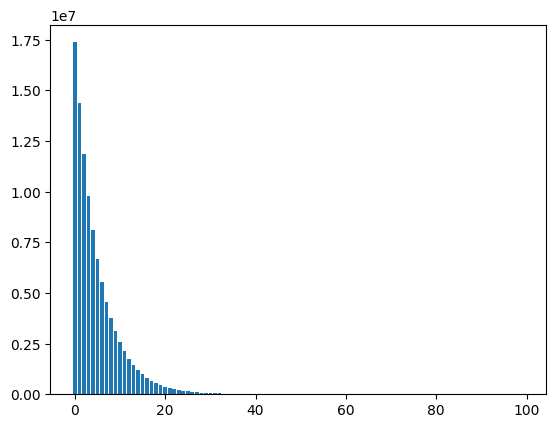

In [13]:
%%time
hist = th.histc(sample_gpu, bins=100)
hist_cpu = hist.to(device='cpu')
plt.bar(range(100), hist_cpu);

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите столбцы со второго по четвертый; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

In [7]:
t = th.randint(0, 256, size=(10, 6, 6, 3))
t[:, :, :, 0][:, :, 2:] = 0
t[:, :, :, 1][:, :, 1:4] = 0
t[:, :, :, 2][:, :, 4:] = 0
t[0]

tensor([[[ 95, 113, 194],
         [208,   0,  30],
         [  0,   0,  28],
         [  0,   0, 147],
         [  0, 203,   0],
         [  0,  79,   0]],

        [[248, 169, 249],
         [ 46,   0, 227],
         [  0,   0, 166],
         [  0,   0,  77],
         [  0,  75,   0],
         [  0,   3,   0]],

        [[106, 134, 136],
         [242,   0,  72],
         [  0,   0,  92],
         [  0,   0, 131],
         [  0,  82,   0],
         [  0,  73,   0]],

        [[229, 192,  57],
         [ 69,   0, 114],
         [  0,   0,  33],
         [  0,   0, 142],
         [  0, 144,   0],
         [  0,  27,   0]],

        [[203,  43, 131],
         [ 28,   0, 161],
         [  0,   0, 217],
         [  0,   0,  91],
         [  0,   9,   0],
         [  0,  73,   0]],

        [[ 13, 100,  92],
         [ 92,   0,  65],
         [  0,   0, 218],
         [  0,   0, 190],
         [  0,  21,   0],
         [  0, 147,   0]]])

## Обратная связь
- [ ] Хочу получить обратную связь по решению